## Polytope Climate-DT Trajectory example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-geo
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [14]:
import earthkit.data
import earthkit.plots

In [15]:
train_route = []

# Inverness
train_route.append([57.479, 360-4.223])

# Perth
train_route.append([56.395, 360-3.435])

# Edinburg Waverley
train_route.append([55.952, 360-3.189])

# Carlisle
train_route.append([54.892, 360-2.933])

# Lancaster
train_route.append([54.047, 360-2.808])

# Preston
train_route.append([53.757, 360-2.703])

# Crewe
train_route.append([53.089, 360-2.435])

# Birmingham New Street
train_route.append([52.478, 360-1.899])



In [16]:
request = {
    "class": "d1",
    "dataset": "on-demand-extremes-dt",
    "stream": "oper",
    "type": "fc",
    "date": "20250926",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0099",
    "param": "167",
    "georef": "gcgkrb",
    "step": "1",
    "feature" :{ 
        "type" : "trajectory", 
        "points" : train_route, 
        "inflation" : 0.01, 
        "inflate" : "round",
        "axes" :["latitude", "longitude"], 
    },
}


In [11]:
data = earthkit.data.from_source("polytope", "destination-earth", request,
                               stream=False,
                               address="polytope-test.lumi.apps.dte.destination-earth.eu",
                               )

2025-10-23 17:43:25 - INFO - Key read from /Users/male/.polytopeapirc
2025-10-23 17:43:25 - INFO - Sending request...
{'request': 'class: d1\n'
            'dataset: on-demand-extremes-dt\n'
            "date: '20250926'\n"
            'expver: 0099\n'
            'feature:\n'
            '  axes:\n'
            '  - latitude\n'
            '  - longitude\n'
            '  inflate: round\n'
            '  inflation: 0.01\n'
            '  points:\n'
            '  - - 57.479\n'
            '    - 355.777\n'
            '  - - 56.395\n'
            '    - 356.565\n'
            '  - - 55.952\n'
            '    - 356.811\n'
            '  - - 54.892\n'
            '    - 357.067\n'
            '  - - 54.047\n'
            '    - 357.192\n'
            '  - - 53.757\n'
            '    - 357.297\n'
            '  - - 53.089\n'
            '    - 357.565\n'
            '  - - 52.478\n'
            '    - 358.101\n'
            '  type: trajectory\n'
            'georef: gcgkrb\n'
        

In [12]:
ds = data.to_xarray()

ds

<xarray.Dataset> Size: 157kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 3276)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-09-26T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 1
  * points     (points) int64 26kB 0 1 2 3 4 5 ... 3270 3271 3272 3273 3274 3275
    latitude   (points) float64 26kB 52.47 52.47 52.47 ... 57.48 57.48 57.49
    longitude  (points) float64 26kB 358.1 358.1 358.1 ... 355.8 355.8 355.8
    levelist   (points) float64 26kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    time       (points) int64 26kB 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Data variables:
    2t         (datetimes, number, steps, points) float64 26kB 281.9 ... 282.7
Attributes:
    class:          d1
    dataset:        on-demand-extremes-dt
    stream:         oper
    expver:         0099
    type:           fc
    Forecast date:  2025-09-26T00:00:00Z
    levtype:        sfc
    georef:         gcgkrb
    step:           1
    number:         0

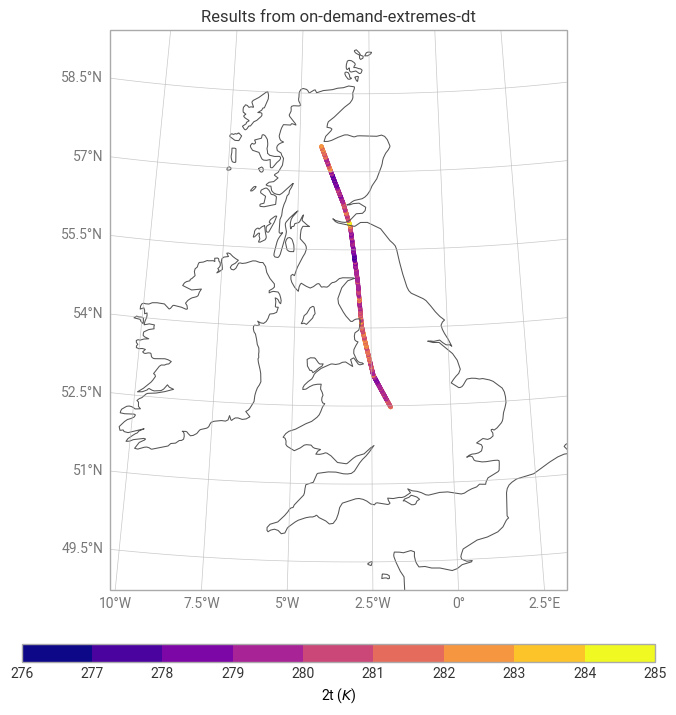

In [13]:
import earthkit.plots
chart = earthkit.plots.Map(domain=["Ireland", "United Kingdom"])
chart.point_cloud(
    ds['2t'],
    x="longitude",
    y="latitude",
)
chart.title(f"Results from on-demand-extremes-dt")
chart.coastlines()
chart.gridlines()
chart.legend()
chart.show()